# Evaluación 1 Parte 2

Brian Patiño Agudelo\
Juan David Muñoz \
Carlos Daniel S

In [29]:
#from ipywidgets import interactive, IntSlider,FloatSlider

#from lcapy import Circuit, j, omega, s

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti
import control as ct
#from scipy.stats import expon
#import scipy.fftpack as fourier
#from scipy.fftpack import fft, fftfreq, fftshift

#import seaborn as sns
#import sympy as syn
#import sklearn as skn
#from scipy.stats import norm
#from sklearn.neighbors import KernelDensity
from scipy import signal
import math

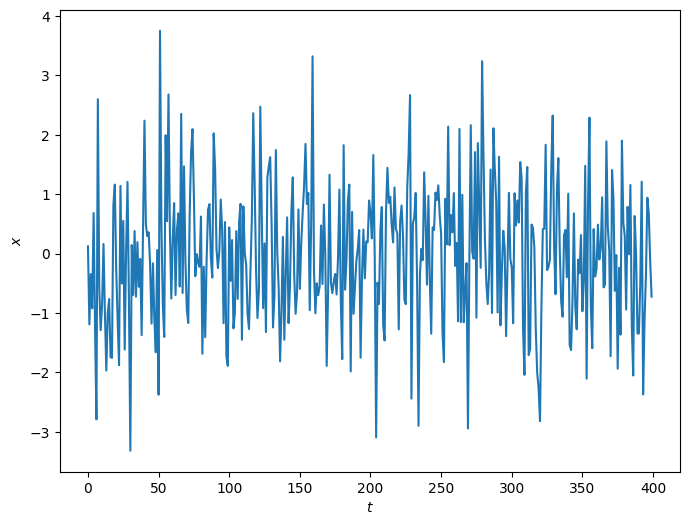

In [3]:

dt = 0.01 # base de tiempo
t=np.arange(0,4,dt)

N =  len(t)# // numero de muestras 
μ  = 0
V2 = 1.21 

real_G = np.random.normal(μ, np.sqrt(V2), N) ## FDP GAUSSIANA REAL 

plt.figure(figsize=(8,6))
plt.plot(np.arange(N), real_G)
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

In [4]:
C1 = 2.7e-6
C2 = 1e-6
R1 = 3300
R2 = 6200

s = ct.tf('s')
H = 1/(C1*C2*R1*R2*s**2+(C1*R1+C2*R2+C2*R2)*s+1)

ct.tf(H)




TransferFunction(array([1]), array([5.5242e-05, 2.1310e-02, 1.0000e+00]))

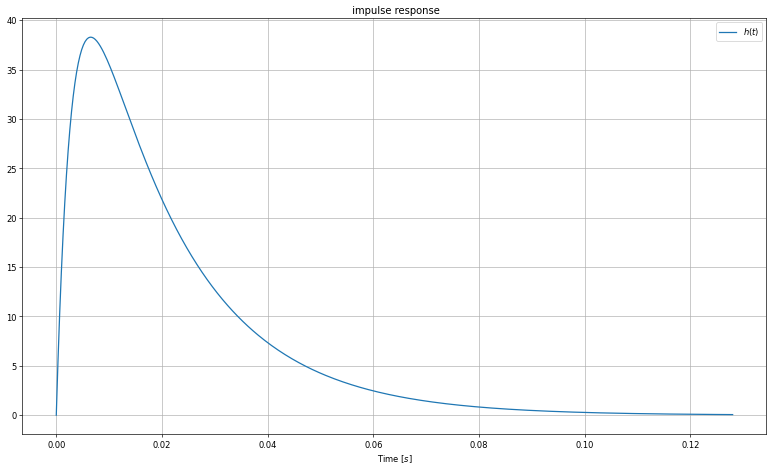

In [5]:
coef_num =[1]
coef_den=[C1*C2*R1*R2, C1*R1+C2*R2+C2*R2, 1]

lti_system=lti(coef_num,coef_den)
Nsample = len(t)
t,h= lti_system.impulse(N = Nsample)

plt.figure(figsize=(16,9), dpi=60)
plt.plot(t,h, label = '$h(t)$')
plt.grid()
plt.legend()
plt.title(' impulse response')
plt.xlabel('Time [$s$]')
plt.show()

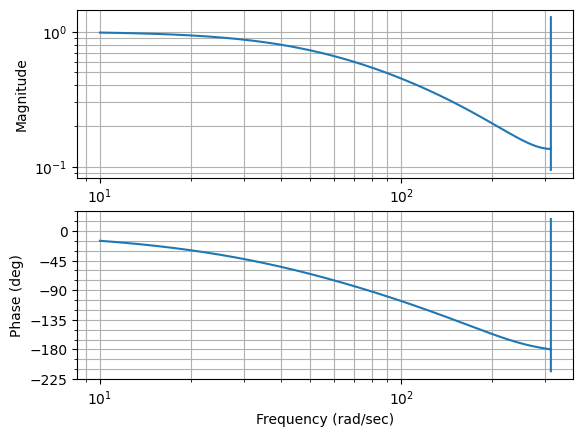

In [6]:
sys = ct.TransferFunction(coef_num,coef_den)
sys_d = ct.c2d(sys, dt)

ct.bode_plot(sys_d)
plt.show()

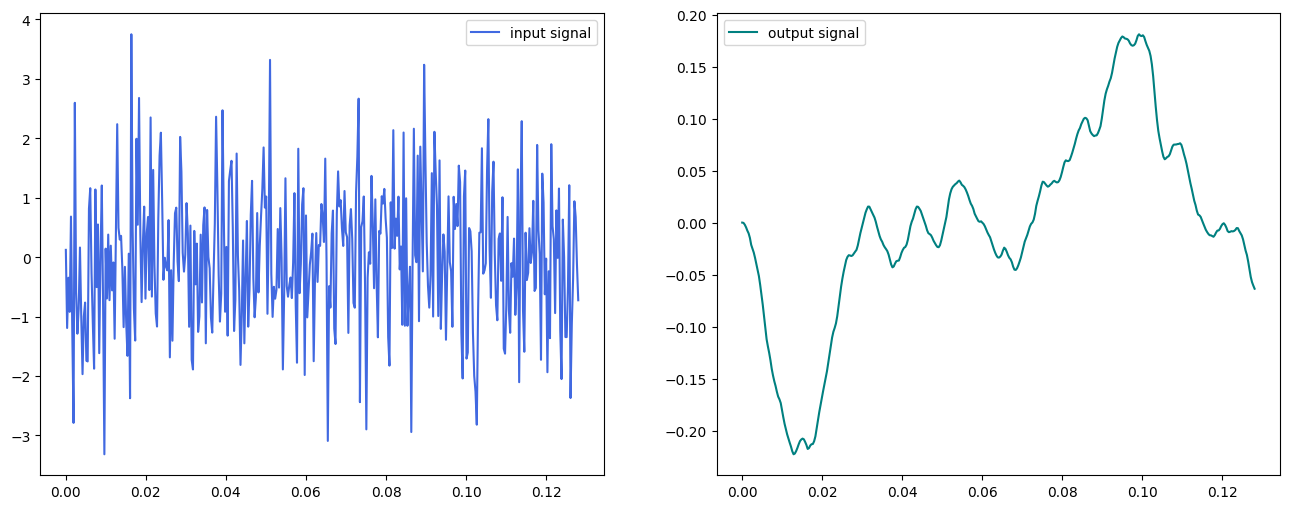

In [7]:
Nsample = len(t)

""" 
Fdisc = Nsample/4
Tdisc= 1/Fdisc
time = np.arange(0,4,Tdisc)
l = np.pi
"""

expt = real_G

_,Output_circuit,_ = lti_system.output(expt,t) 

fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(t, expt,color='royalblue',label='input signal')
ax[0].legend()
ax[1].plot(t, Output_circuit,color = 'teal',label='output signal')
ax[1].legend()
plt.show()

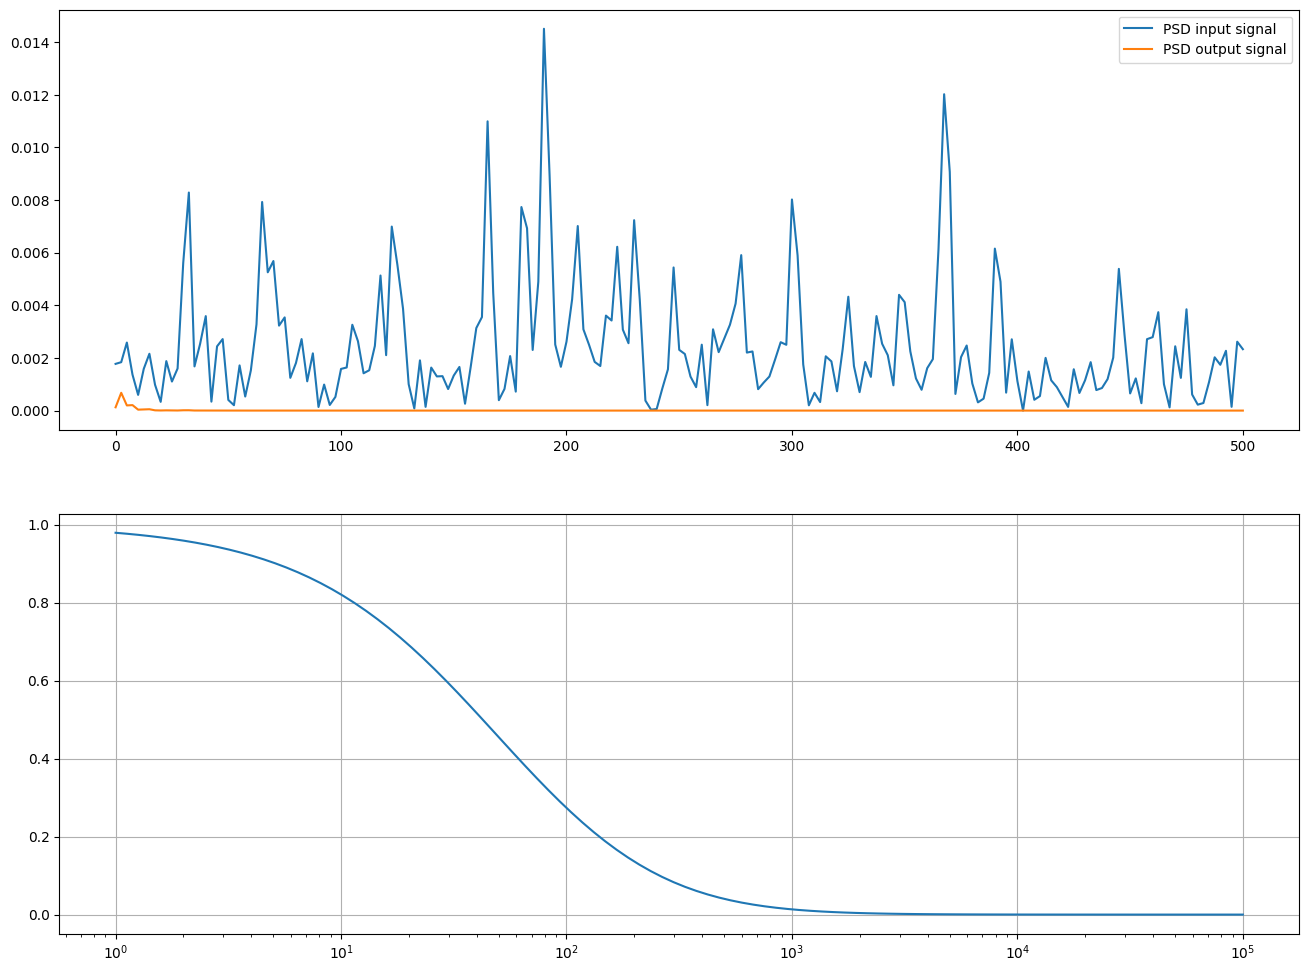

In [8]:
fs = 1000  # Frecuencia de muestreo (Hz)
# Calcular la PSD
f, Pxx = signal.welch(real_G, fs, nperseg=len(t))
f2, Pxx2 = signal.welch(Output_circuit, fs, nperseg=len(t))
freq = np.logspace(0,5,100)
tf = 1/(5.24*10**(-5)*freq**2 +0.02131*freq+1)
# Graficar la PSD
fig, ax=plt.subplots(2,1,figsize=(16,12))
#plt.ylabel('Densidad espectral de potencia')
ax[0].plot(f, Pxx,label='PSD input signal')
ax[0].plot(f2, Pxx2,label='PSD output signal')
ax[0].legend()
#plt.title('PSD')

ax[1].semilogx(freq,tf)
#plt.xlabel('Frecuencia (Hz)')


plt.grid(True)
plt.show()

### Entrada
real_G

### salida
Output_circuit


$\tau =0$ correponde a la correlacion de la variable aleatoria consigo misma

In [9]:
Pxx.mean()

0.0024492267701305055

In [10]:
def correlacion(data, tau):
    N= len(data)
    dx=0.001
    suma = 0
    for x in data:
        suma = suma + x*dx*(x+tau)

    return 1/N *suma 


def densidad_espectral(R):
    return 2*R
           
    
R_x1 = correlacion(real_G,0)
densidad_espectral(R_x1)

R2 = correlacion(Output_circuit,0)
print(R_x1, ' \\\\\\\\\ ',R2)


0.0013236303905604292  \\\\\  8.656028471053824e-06


In [11]:

import scipy.fftpack as fourier
import sympy as sym


tau = sym.symbols('t',real=True)
N02= R_x1*sym.DiracDelta(tau)
N02


0.00132363039056043*DiracDelta(t)

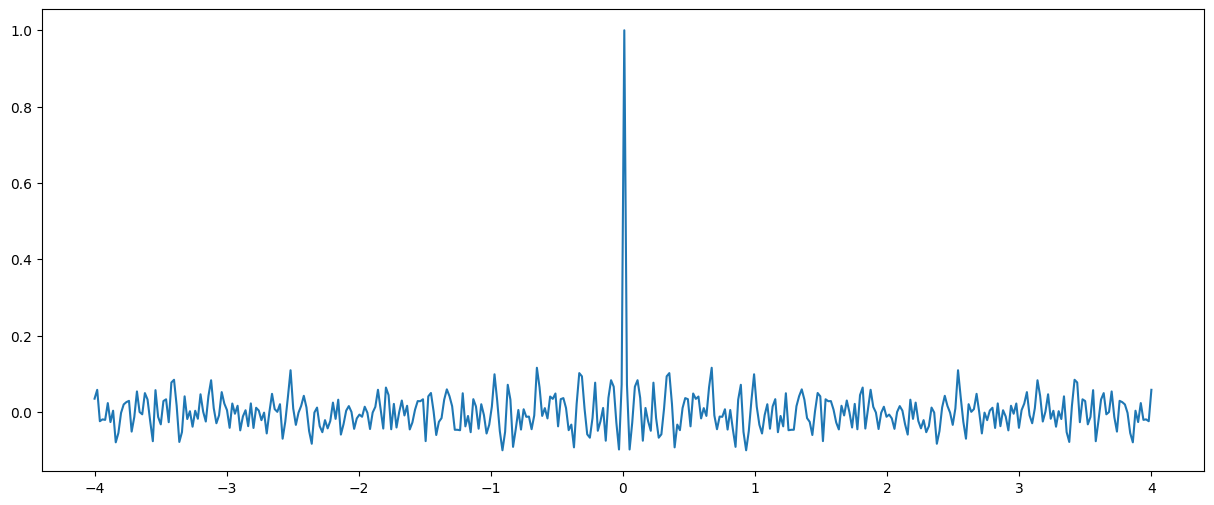

In [35]:
cor = np.correlate(real_G,real_G,mode='same')
max = np.max(cor)
normalice=[]
for x in cor:
    normalice.append(x/max)

time = np.linspace(-4,4,len(normalice))
plt.figure(figsize=(15,6))
plt.plot(time, normalice)
plt.show()


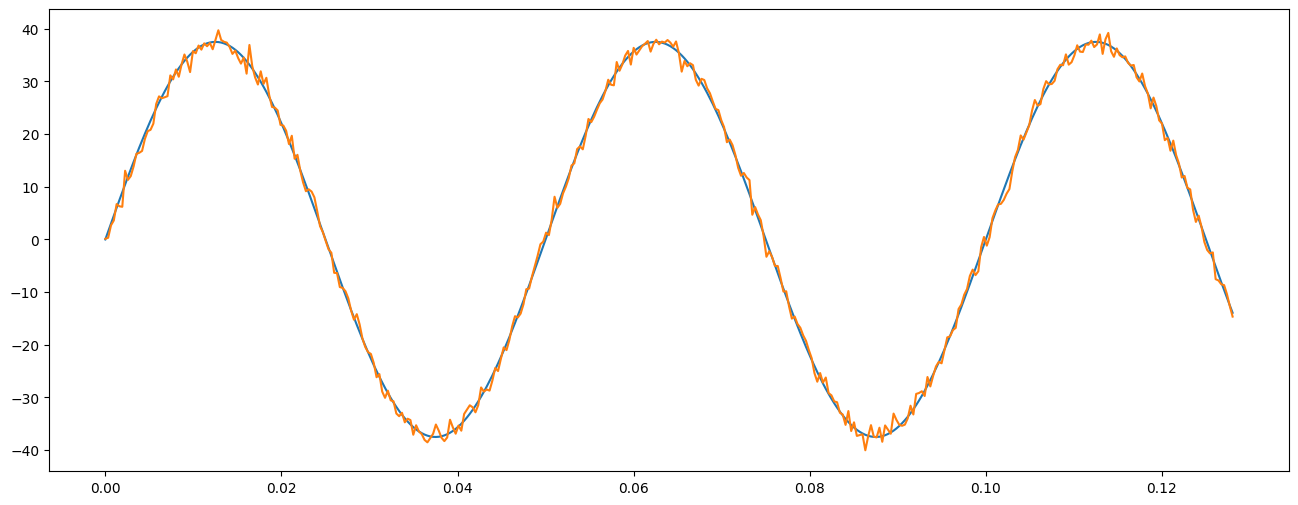

In [187]:
#dt = 0.01 # base de tiempo
#t=np.arange(0,4,dt)
pico = np.max(real_G)
db = 20
amplitud = pico*10**(db/20)
signal2 = amplitud*np.sin(2*np.pi*20*t)

suma = signal2+real_G

plt.figure(figsize=(16,6))
plt.plot(t,signal2)
plt.plot(t,suma)
plt.show()

In [55]:
def normalizar(x):
    max = np.max(x)
    normal =[]
    for i in x:
        normal.append(i/max)
        
    return normal

In [63]:
def normalizar2(x):
    max = np.max(x)
    normal =np.zeros(len(x))
    for i in range(len(x)):
        normal[i]=x[i]/max
        
    return normal

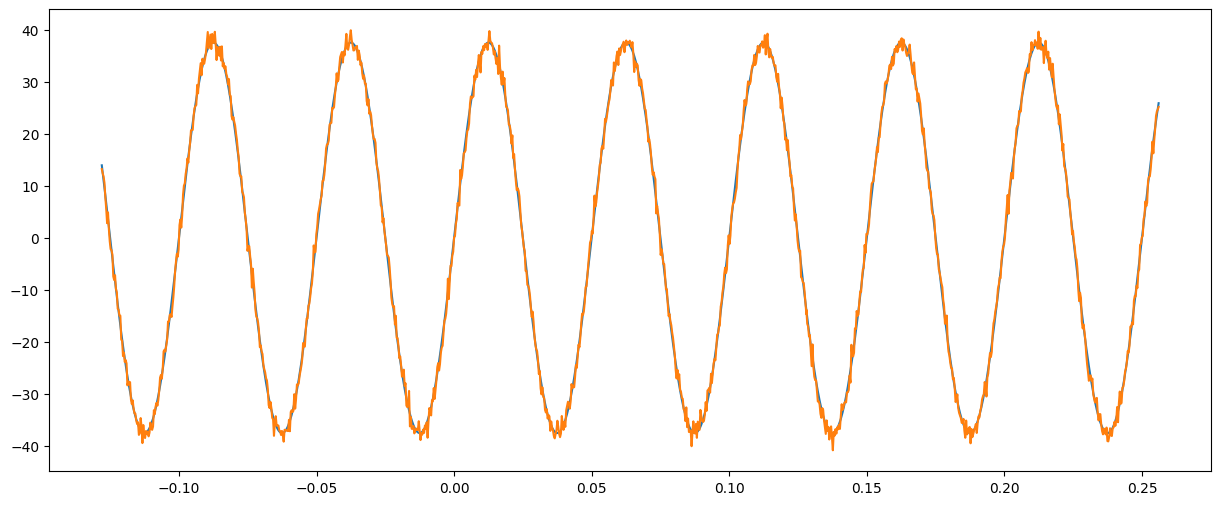

In [188]:
#timetry2 = np.linspace(-4,8,3*len(t))
#signaltry2 = amplitud*np.sin(2*np.pi*20*timetry2)
timetry2 = np.concatenate((np.flip(-t),t,t+t[-1]))
signaltry2 = np.concatenate((np.flip(amplitud*np.sin(2*np.pi*20*(-t))),signal2,amplitud*np.sin(2*np.pi*20*(t+t[-1]))))

sumatry2 = np.concatenate((np.flip(amplitud*np.sin(2*np.pi*20*(-t)))+np.flip(real_G),signal2+real_G,amplitud*np.sin(2*np.pi*20*(t+t[-1]))+real_G))

plt.figure(figsize=(15,6))
plt.plot(timetry2,signaltry2)
plt.plot(timetry2,sumatry2)
plt.show()

In [167]:
signaltry2.shape

(1200,)

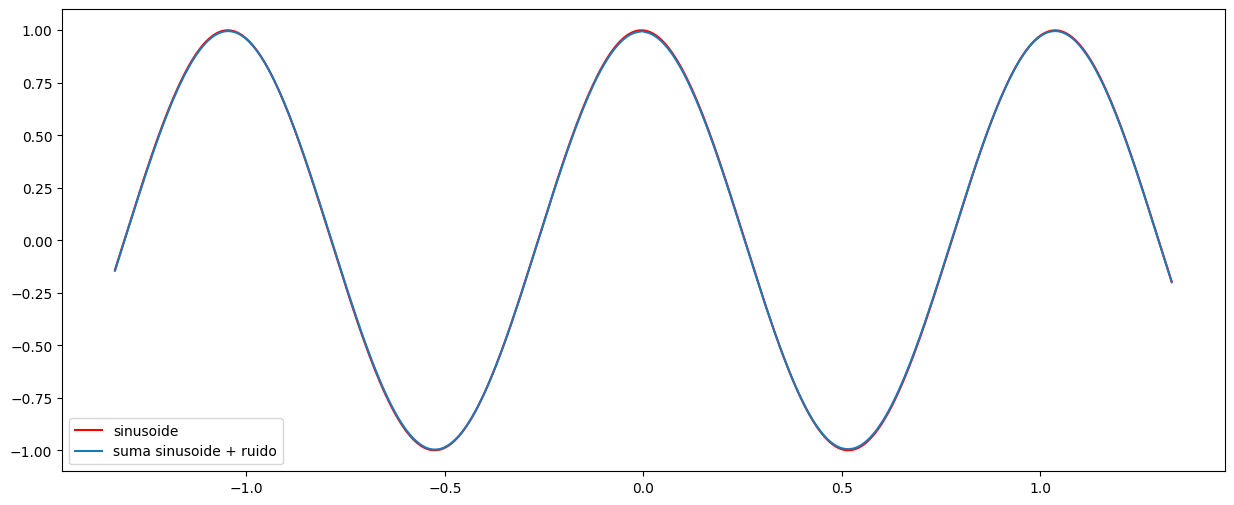

In [190]:
cor1 = np.correlate(signal2,signaltry2,mode='same')
cor2 = np.correlate(suma,sumatry2,mode='same')
normalice1 = normalizar2(cor1)
normalice2 = normalizar2(cor2)

time = np.linspace(-4,4,len(normalice1))
plt.figure(figsize=(15,6))
plt.plot(time[400:800], normalice1[400:800], label='sinusoide',color='red')
plt.plot(time[400:800], normalice2[400:800],label='suma sinusoide + ruido')
#plt.plot(range(len(normalice1)), normalice1,label='suma sinusoide + ruido')
plt.legend()
plt.show()

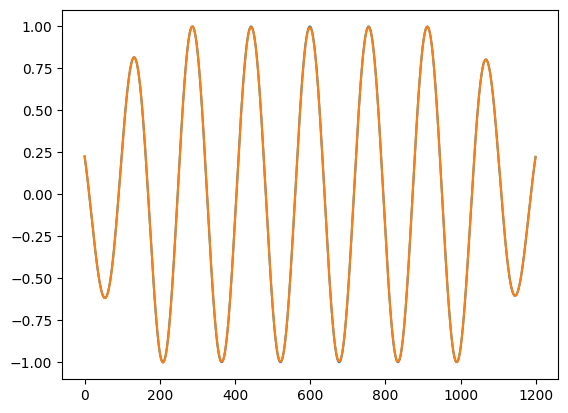

In [192]:
plt.plot(normalice1)
plt.plot(normalice2)
plt.show()

In [186]:
normalice1.shape

(1200,)